<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-Assignment2/blob/main/Dm_Multiclass_Classification_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 28.8 MB/s eta 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# check version
import pycaret
pycaret.__version__

In [ ]:
import pandas as pd
from pycaret.classification import ClassificationExperiment, load_model, predict_model

In [ ]:
# URL to the dataset (available in the UCI repository)
url_iris="https://archive.ics.uci.edu/dataset/53/iris"



Please find the attached dataset of Iris:
https://archive.ics.uci.edu/dataset/53/iris

In [ ]:
from pycaret.datasets import get_data
data=get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from pycaret.classification import *
e1=setup(data=data,target='species',session_id=150)

,Description,Value
0,Session id,150
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9809,1.0000,0.9809,0.9852,0.9805,0.9710,0.9735,0.0500
lda,Linear Discriminant Analysis,0.9809,1.0000,0.9809,0.9852,0.9805,0.9710,0.9735,0.0290
knn,K Neighbors Classifier,0.9618,0.9830,0.9618,0.9664,0.9618,0.9425,0.9447,0.0450
nb,Naive Bayes,0.9618,0.9969,0.9618,0.9714,0.9618,0.9430,0.9477,0.0480
ada,Ada Boost Classifier,0.9618,0.9834,0.9618,0.9714,0.9618,0.9430,0.9477,0.2010
rf,Random Forest Classifier,0.9527,0.9867,0.9527,0.9641,0.9523,0.9291,0.9349,0.3510
xgboost,Extreme Gradient Boosting,0.9527,0.9625,0.9527,0.9641,0.9523,0.9291,0.9349,0.0610
lr,Logistic Regression,0.9518,0.9969,0.9518,0.9589,0.9518,0.9276,0.9311,0.6350
lightgbm,Light Gradient Boosting Machine,0.9518,0.9797,0.9518,0.9584,0.9514,0.9273,0.9308,0.0880
gbc,Gradient Boosting Classifier,0.9436,0.9665,0.9436,0.9573,0.9432,0.9155,0.9224,0.4080


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
dt=e1.create_model('dt')
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9375,0.9091,0.9318,0.9091,0.8642,0.8750
1,0.8182,0.8661,0.8182,0.8182,0.8182,0.7250,0.7250
2,0.9091,0.9375,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,0.9375,0.9091,0.9318,0.9091,0.8642,0.8750
5,0.9000,0.9286,0.9000,0.9250,0.9000,0.8507,0.8636
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=150, splitter='best')


In [ ]:
knn=e1.create_model('knn')
print(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
5,0.8000,0.8298,0.8000,0.8000,0.8000,0.6970,0.6970
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
lr=e1.create_model('lr')
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
5,0.8000,0.9690,0.8000,0.8000,0.8000,0.6970,0.6970
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=150, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#comparing baseline models
baseline_m=e1.compare_models
baseline_m

<bound method ClassificationExperiment.compare_models of <pycaret.classification.oop.ClassificationExperiment object at 0x79d981603a00>>

In [ ]:
# tune_model() does not take trained model object as an input. Pycaret.classification require a trained model object as an argument. so here we are creating the trained model.
lr_model=e1.create_model('lr')
knn_model=e1.create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
5,0.8000,0.9690,0.8000,0.8000,0.8000,0.6970,0.6970
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
5,0.8000,0.8298,0.8000,0.8000,0.8000,0.6970,0.6970
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_dt=e1.tune_model(lr_model)
tuned_knn=e1.tune_model(knn_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
5,0.9000,0.9690,0.9000,0.9200,0.8956,0.8462,0.8598
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8000,0.8298,0.8000,0.8000,0.8000,0.6970,0.6970
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


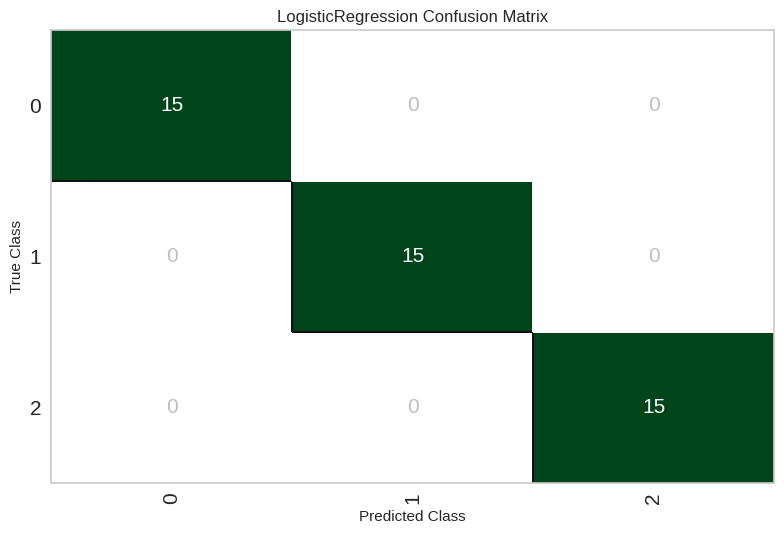

In [ ]:
e1.plot_model(lr,'confusion_matrix')

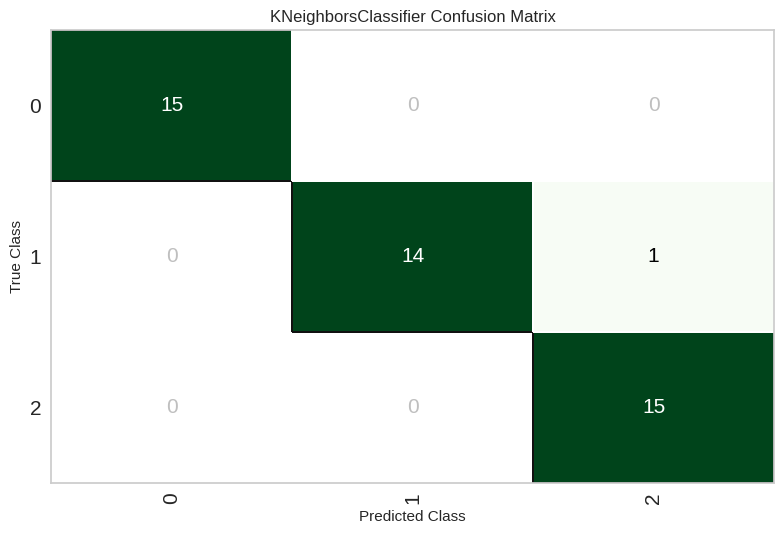

In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

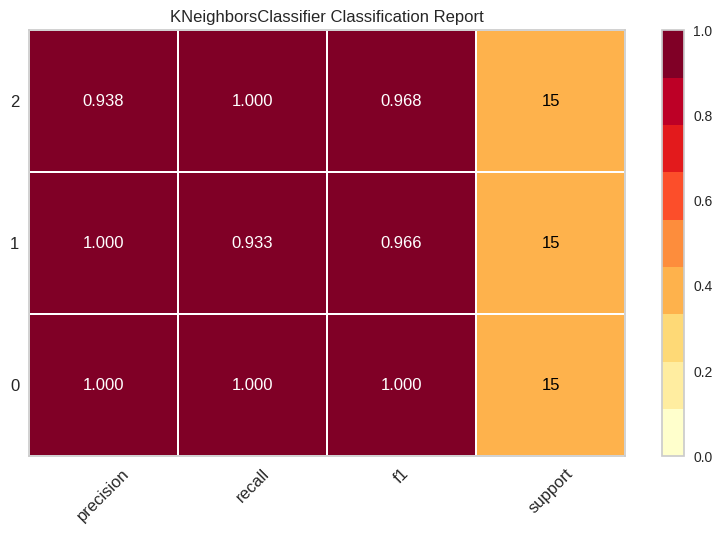

In [ ]:
plot_model(tuned_knn, plot='class_report')

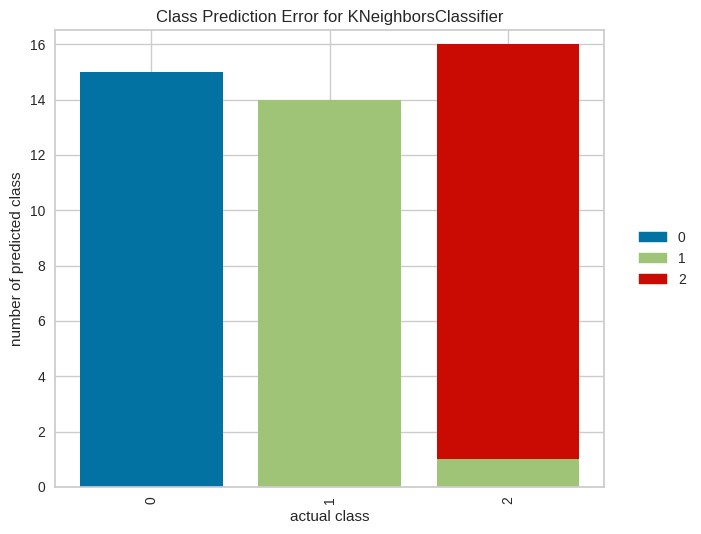

In [ ]:
plot_model(tuned_knn, plot = 'error')

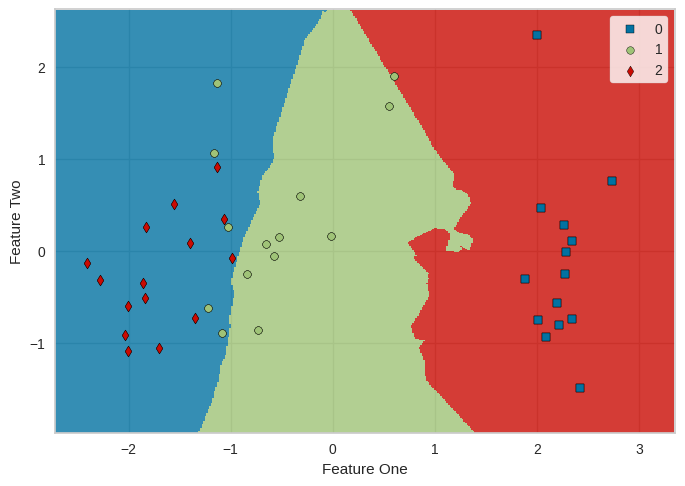

In [ ]:
plot_model(tuned_knn, plot='boundary')

In [ ]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9778,0.9978,0.9778,0.9792,0.9778,0.9667,0.9674


In [ ]:
final_knn=finalize_model(tuned_knn)

In [ ]:
data=data.sample(frac=1, random_state=900).reset_index(drop=True)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.7,4.1,1.0,Iris-versicolor
1,5.0,3.5,1.6,0.6,Iris-setosa
2,5.7,4.4,1.5,0.4,Iris-setosa
3,5.0,3.2,1.2,0.2,Iris-setosa
4,6.2,2.8,4.8,1.8,Iris-virginica
...,...,...,...,...,...
89,5.5,2.3,4.0,1.3,Iris-versicolor
90,5.1,3.5,1.4,0.3,Iris-setosa
91,5.8,2.7,3.9,1.2,Iris-versicolor
92,6.3,3.3,6.0,2.5,Iris-virginica


In [ ]:
data_unseen=data.drop(data.index).reset_index(drop=True)


In [ ]:
save_model(final_knn,'Final KNN Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c